In [1]:
# Sentiment analysis of tweets

In [46]:
# Import libraries
import tweepy
from textblob import TextBlob
import nltk
# For textblob tags
#nltk.download('averaged_perceptron_tagger') # For POS tags
nltk.download('brown')
 # For noun phrases
#nltk.download('wordnet') # For lemmatize
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [18]:
# Twitter credentials
APIKey = "rn1i0b2dULhTtAGA7985QAaHl"
APISecret = "Vzl9crKXnnjknc4ejJg45PhkZns8pOeEOpswezvp7SGZOOcUdY"
accesToken = "1247490423846776834-SxSXiR3YhimyvULeozOefJ8cj9o5Ht"
accesTokenSecret = "VmfHc3QhAJtEZA9bZwd8yoB37jGgRmQrJ3pOU1Kn8FujC"

In [19]:
# Create authentication object
authenticate = tweepy.OAuthHandler(APIKey, APISecret)

# Set acces token and secret
authenticate.set_access_token(accesToken, accesTokenSecret)

# Create API object while passing in the auth info
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [20]:
# Extract 100 tweets from twitter user
posts = api.user_timeline(screen_name = "StockTexts", count=100, lang = "en", tweet_mode="extended")

# Print last 5 tweets from account
print("Show 5 recent tweets: \n")
for tweet in posts[0:5]:
    print(tweet.full_text + "\n")

Show 5 recent tweets: 

$NSFDF $SFD NXT Energy Solutions Announces 2019 Year End Results Toronto Stock Exchange:SFD https://t.co/bjbug77GMj

$PRGS Progress Releases 2019 Corporate Social Responsibility Report Nasdaq:PRGS https://t.co/sKEj48Vot8

$NXST Nexstar Media Group, Inc. SEC Filing: Form 4 https://t.co/QvdDrN63Bv

$BIG Big Lots, Inc. SEC Filing: Form 4 https://t.co/aeHcVVKY6B

$NSAUF MegumaGold Provides Update on Osprey Acquisition and Its Projects Canadian Stock Exchange:https://t.co/VAtKTqpA5L https://t.co/hAMmUBrJmK



In [21]:
# Create a dataframe with column called called tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])

# Show df head
df.head()

,Tweets
0,$NSFDF $SFD NXT Energy Solutions Announces 201...
1,$PRGS Progress Releases 2019 Corporate Social ...
2,"$NXST Nexstar Media Group, Inc. SEC Filing: Fo..."
3,"$BIG Big Lots, Inc. SEC Filing: Form 4 https:/..."
4,$NSAUF MegumaGold Provides Update on Osprey Ac...


In [22]:
# Clean up the text

#Create function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removed @ mentions
    text = re.sub(r'#', '', text) # Remove the # symbol
    text = re.sub(r'RT[\s]+', '', text) #Remove retweet
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyperlink
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show
df.head()

,Tweets
0,$NSFDF $SFD NXT Energy Solutions Announces 201...
1,$PRGS Progress Releases 2019 Corporate Social ...
2,"$NXST Nexstar Media Group, Inc. SEC Filing: Fo..."
3,"$BIG Big Lots, Inc. SEC Filing: Form 4"
4,$NSAUF MegumaGold Provides Update on Osprey Ac...


In [23]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show
df.head()

,Tweets,Subjectivity,Polarity
0,$NSFDF $SFD NXT Energy Solutions Announces 201...,0.000000,0.000000
1,$PRGS Progress Releases 2019 Corporate Social ...,0.033333,0.016667
2,"$NXST Nexstar Media Group, Inc. SEC Filing: Fo...",0.600000,-0.100000
3,"$BIG Big Lots, Inc. SEC Filing: Form 4",0.266667,-0.033333
4,$NSAUF MegumaGold Provides Update on Osprey Ac...,0.000000,0.000000


In [54]:
# Find POS tags
def getTags(text):
    return TextBlob(text).tags

def getNP(text):
    return TextBlob(text).noun_phrases

def getSS(text):
    return TextBlob(text).synsets()

df['Tags'] = df['Tweets'].apply(getTags)

df['NP'] = df['Tweets'].apply(getNP)

#df['SynSet'] = df['Tweets'].apply(getSS)

wordList = df['Tags'][0]
nounList = df['NP'][0]

npList = list()
for word, tag in df['Tags'][0]:
  if tag == 'NNP':
    npList.append(word.lemmatize())



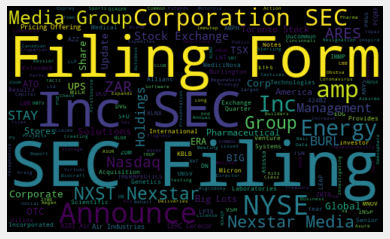

In [25]:
# Word cloud
allWords = ' '.join(twts for twts in df['Tweets'])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size =199).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [26]:
# Create function to compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show df
df

,Tweets,Subjectivity,Polarity,Analysis
0,$NSFDF $SFD NXT Energy Solutions Announces 201...,0.000000,0.000000,Neutral
1,$PRGS Progress Releases 2019 Corporate Social ...,0.033333,0.016667,Positive
2,"$NXST Nexstar Media Group, Inc. SEC Filing: Fo...",0.600000,-0.100000,Negative
3,"$BIG Big Lots, Inc. SEC Filing: Form 4",0.266667,-0.033333,Negative
4,$NSAUF MegumaGold Provides Update on Osprey Ac...,0.000000,0.000000,Neutral
...,...,...,...,...
95,$VSH Vishay Intertechnology to Announce First ...,0.166667,0.125000,Positive
96,"$AMPH Amphastar Pharmaceuticals, Inc. Announce...",0.000000,0.000000,Neutral
97,$MLPX $PAK $GXG $MLPA $GREK Global X ETFs Anno...,0.000000,0.000000,Neutral
98,"$BDR Blonder Tongue Laboratories, Inc. SEC Fil...",0.600000,-0.100000,Negative


In [27]:
# Print sorted tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])

for i in range(0, 100):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+') '+ sortedDF['Tweets'][i])
        print()
        j = j+1

1) $PRGS Progress Releases 2019 Corporate Social Responsibility Report Nasdaq:PRGS 

2) $CBB Rigrodsky &amp; Long, P.A. Files Class Action Suit Against Cincinnati Bell Inc. 

3) $PCQRF $PCQ Petrolympic Postponement of Fourth Quarter and Full Year Filings Other OTC:PCQRF 

4) $VSH Vishay Intertechnology to Announce First Quarter 2020 Financial Results on Tuesday, May 12 NYSE:VSH 



<function matplotlib.pyplot.show(*args, **kw)>

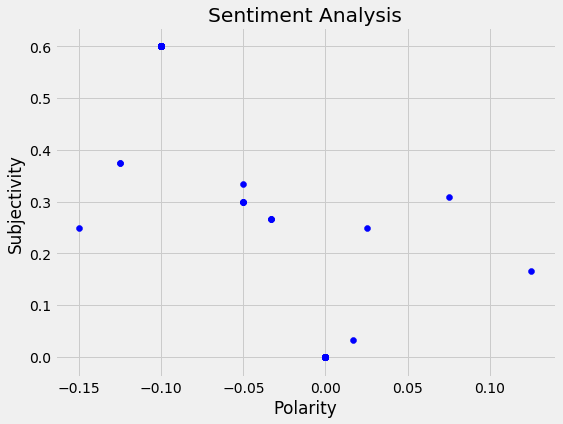

In [28]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

In [29]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

str((ptweets.shape[0] / df.shape[0])*100)+'%'

'4.0%'

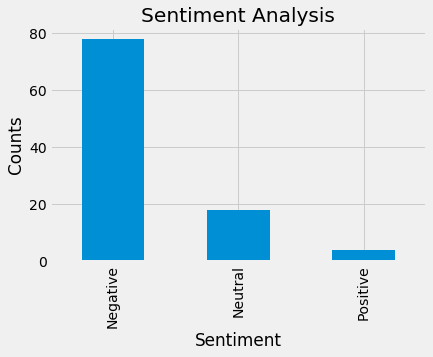

In [30]:
# Show value count

df['Analysis'].value_counts()

#plot and visualise counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()